In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

<h1>IMPORTANDO E CONFERINDO DADOS</h1>
<p align='justify'> Para conseguir responder as perguntas do relatório, serão utilizados dados da <a href='https://basedosdados.org/'>base dos dados</a>. Apesar de a maioria deles já ser classificado como dado limpo no site, vale a pena conferir se está tudo em ordem.</p> 
<h2>IPS</h2>
<p align='justify'>Primeiramente, vamos importar os dados referentes ao Índice de Progesso Social (IPS) no Rio de Janeiro. Esses dados trazem imformações sobre como o Rio de Janeiro no geral e como algumas regiões do Rio estão performando em questões sociais. Cada indicador social recebe uma nota de 0 a 100 informando o quão bem a região do Rio está em um determinado quesito.</p>
<p align='justify'>No total, vamos importar duas bases de dados referentes ao IPS. A primeira delas (dimensões) traz o resultado de métricas 'padrões' do estudo, que são aplicadas mundialmente. O segundo (indicadores) são desdobramentos, ou 'subtópicos' das dimensões.</p>

<h3>DIMENSÕES</h3>

In [66]:
df_dimensoes_rj = pd.read_csv('dimensoes_componentes.csv')
print(df_dimensoes_rj.shape)
df_dimensoes_rj.head()

(99, 18)


,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,2016,Rio De Janeiro,60.77,75.84,70.19,83.68,78.16,71.34,53.28,49.96,50.89,62.03,50.26,53.20,61.46,54.82,64.14,32.36
1,2016,Portuaria,45.33,59.10,87.63,80.80,67.97,0.00,41.67,41.34,20.73,64.74,39.89,35.23,39.35,61.94,34.18,5.43
2,2016,Centro,57.75,62.43,59.38,74.18,91.85,24.31,52.41,55.60,56.00,41.04,56.99,58.42,45.89,87.27,52.24,48.26
3,2016,Rio Comprido,52.43,58.97,61.22,84.36,64.78,25.52,47.19,34.00,42.08,47.84,64.84,51.14,66.89,50.45,64.74,22.48
4,2016,Botafogo,87.12,93.32,85.15,98.49,99.55,90.08,81.13,78.47,86.52,81.46,78.07,86.91,68.19,85.74,94.30,99.39


In [67]:
bairros = pd.unique(df_dimensoes_rj['regiao_administrativa'])
print(len(bairros))
anos = pd.unique(df_dimensoes_rj['ano'])
anos

33


array([2016, 2018, 2020], dtype=int64)

<p align='justify'>Ou seja, temos no total 33 bairros do Rio sendo analisados em 3 anos diferentes: 2016, 2018, 2020</p>

In [68]:
df_dimensoes_rj_2016 = df_dimensoes_rj[df_dimensoes_rj['ano'] == 2016] 
df_dimensoes_rj_2018 = df_dimensoes_rj[df_dimensoes_rj['ano'] == 2018] 
df_dimensoes_rj_2020 = df_dimensoes_rj[df_dimensoes_rj['ano'] == 2020] 
print(df_dimensoes_rj_2016.shape)
print(df_dimensoes_rj_2018.shape)
print(df_dimensoes_rj_2020.shape)

(33, 18)
(33, 18)
(33, 18)


In [69]:
df_dimensoes_aux = df_dimensoes_rj.copy()
del df_dimensoes_aux['regiao_administrativa']

#verificando notas fora da escala de avaliação (0 a 100)
print((df_dimensoes_aux < 0).values.any())
(df_dimensoes_aux > 100).any()

False


ano                                            True
ips_geral                                     False
necessidades_humanas_basicas_nota_dimensao    False
nutricao_cuidados_medicos_basicos             False
agua_saneamento                               False
moradia                                       False
seguranca_pessoal                             False
fundamentos_bem_estar_nota_dimensao           False
acesso_conhecimento_basico                    False
acesso_informacao                             False
saude_bem_estar                               False
qualidade_meio_ambiente                       False
oportunidades_nota_dimensao                   False
direitos_individuais                          False
liberdades_individuais                        False
tolerancia_inclusao                           False
acesso_educacao_superior                      False
dtype: bool

In [70]:
#verificando para valores nulos
df_dimensoes_rj.isnull().values.any()

False

<h3>INDICADORES</h3>
<p align='justify'>Importando os dados referentes aos indicadores do estudo: </p>

In [71]:
df_indicadores_rj = pd.read_csv('indicadores.csv')
print(df_indicadores_rj.shape)
df_indicadores_rj.head()

(99, 38)


,ano,regiao_administrativa,mortalidade_infancia,prop_baixo_peso_nascer,mortalidade_materna,taxa_internacoes_infantis_crise_respiratoria_aguda,prop_acesso_agua_canalizada,prop_acesso_esgotamento_sanitario,prop_acesso_banheiro,prop_populacao_vivendo_favelas_nao_urbanizadas,...,taxa_participacao_politica,prop_gravidez_adolescencia,trabalho_infantil,indice_acesso_cultura,taxa_violencia_contra_mulher,taxa_homicidios_jovens_negros,prop_vulnerabilidade_familiar,prop_pessoas_ensino_superior,prop_negros_indigenas_ensino_superior,prop_frequencia_ensino_superior
0,2016,Rio De Janeiro,2.77,9.21,52.61,8.48,98.47,89.95,98.73,19.16,...,0.21,16.42,11.14,30.34,353.56,9.00,2.29,21.26,9.82,28.04
1,2016,Portuaria,0.91,7.40,75.81,9.66,99.73,93.97,94.26,13.18,...,0.25,20.17,9.51,67.26,601.89,6.13,4.54,3.88,2.10,9.81
2,2016,Centro,3.92,10.53,0.00,9.77,99.66,92.23,92.34,0.26,...,0.30,13.16,0.00,100.00,1009.09,5.41,1.35,24.02,18.03,39.37
3,2016,Rio Comprido,3.71,10.29,27.93,7.88,99.46,93.03,96.45,35.44,...,0.24,16.99,3.69,7.18,417.22,4.94,2.28,15.16,6.63,21.80
4,2016,Botafogo,1.05,9.16,14.80,4.15,99.87,99.07,99.33,1.67,...,0.26,4.32,8.33,68.39,217.04,2.50,0.59,57.03,35.17,68.69


In [72]:
bairros = pd.unique(df_indicadores_rj['regiao_administrativa'])
print(len(bairros))
anos = pd.unique(df_indicadores_rj ['ano'])
anos

33


array([2016, 2018, 2020], dtype=int64)

<p align='justify'>Novamente, possuímos dados referentes a 33 bairros/regiões administrativas em 3 anos diferentes: 2016, 2018, 2020.</p>

In [73]:
#Conferindo para valores nulos
df_indicadores_rj.isnull().values.any()

False

<h2>ADH</h2>
<p align='justify'>Outra fonte de dados que será utilizada na análise é referente o Atlas do Desenvolvimento Humano (ADH), um estudo realizado pela ONU. Esse estudo traz ainda mais indicadores e nos traz a possibilidade de ter uma visão individual do Rio de Janeiro como município e uma visão geral de Brasil enquanto país.</p>

In [74]:
#importando os dados do atlas que dizem respeito aos municípios do Brasil
df_adh = pd.read_csv('municipio.csv')
print(df_adh.shape)
df_adh.head()

(16695, 230)


,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1991,1100015,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,...,NaN,NaN,NaN,NaN,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,1100023,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,...,NaN,NaN,NaN,NaN,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,1100031,63.16,3.89,41.52,52.94,77.23,85.09,69.00,2.59,...,NaN,NaN,NaN,NaN,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,1100049,65.03,3.81,35.37,45.19,71.11,87.08,72.44,2.47,...,NaN,NaN,NaN,NaN,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,1100056,62.73,3.55,43.00,54.82,71.09,84.62,68.20,2.46,...,NaN,NaN,NaN,NaN,0.152,0.175,0.386,0.167,0.629,0.547


In [75]:
#filtrando para apenas para valores do municipio do Rio de Janeiro
df_adh_rj = df_adh[df_adh['id_municipio'] == 3304557] 
df_adh_rj

,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
3241,1991,3304557,67.85,1.99,30.23,34.49,48.34,89.23,74.14,7.36,...,NaN,NaN,NaN,NaN,0.558,0.450,0.639,0.483,0.714,0.757
8806,2000,3304557,70.26,1.87,21.83,24.70,46.48,92.14,78.51,9.11,...,4973916.0,439657.0,287630.0,4246628.0,0.616,0.603,0.716,0.607,0.754,0.803
14371,2010,3304557,75.69,1.56,13.02,14.65,42.61,92.95,83.10,10.46,...,5559923.0,466608.0,277074.0,4816241.0,0.722,0.717,0.799,0.719,0.845,0.840


In [76]:
#conferindo para valores nulos (NaN)
df_adh_rj_1991 = (df_adh_rj[df_adh_rj['ano'] == 1991]).copy()
print("Quantidade de nulos em 1991:", df_adh_rj_1991.isnull().sum().sum())
nulos_rj_91 = df_adh_rj_1991.columns[df_adh_rj_1991.isna().any()].tolist()
#print("Indicadores nulos de 1991:", nulos_rj_91)

df_adh_rj_2000 = (df_adh_rj[df_adh_rj['ano'] == 2000]).copy()
print("Quantidade de nulos em 2000:",df_adh_rj_2000.isnull().sum().sum())
print("Indicadores nulos de 2000:",  df_adh_rj_2000.columns[df_adh_rj_2000.isna().any()].tolist())

df_adh_rj_2010 = (df_adh_rj[df_adh_rj['ano'] == 2010]).copy()
print("Quantidade de nulos em 2010:",df_adh_rj_2010.isnull().sum().sum())

Quantidade de nulos em 1991: 53
Quantidade de nulos em 2000: 1
Indicadores nulos de 2000: ['renda_media_ocupados']
Quantidade de nulos em 2010: 0


<p align='justify'>No estudo realizado em 1991, temos um total de 53 valores nulos, possivelmente porque essas métricas ainda não haviam sido incluídas no projeto. Felizmente, ainda temos vários outros indicadores para analisar o estudo de 1991 e além disso, esses valores estão praticamente todos preenchidos nos anos seguintes</p>

In [77]:
#importando dados do atlas referentes ao Brasil como um todo
df_adh_br = pd.read_csv('brasil.csv')
print(df_adh_br.shape)
df_adh_br.head()

(3, 229)


,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1991,64.73,2.88,44.68,55.74,65.43,86.90,70.93,4.83,8.16,...,NaN,NaN,NaN,NaN,0.301,0.268,0.493,0.279,0.662,0.647
1,2000,68.61,2.37,30.57,36.98,54.94,90.43,77.63,5.83,8.76,...,136781176.0,17224648.0,10727016.0,108829511.0,0.398,0.488,0.612,0.456,0.727,0.692
2,2010,73.94,1.89,16.70,18.83,45.92,94.37,84.05,7.36,9.54,...,161981299.0,17167135.0,10353865.0,134460298.0,0.549,0.686,0.727,0.637,0.816,0.739


In [78]:
df_adh_br_1991 = (df_adh_br[df_adh_br['ano'] == 1991]).copy()
print("Quantidade de nulos em 1991:", df_adh_br_1991.isnull().sum().sum())
nulos_br_91 = df_adh_br_1991.columns[df_adh_br_1991.isna().any()].tolist()
#print("Indicadores nulos de 1991:", nulos_br_91)

df_adh_br_2000 = (df_adh_br[df_adh_br['ano'] == 2000]).copy()
print("Quantidade de nulos em 2000:",df_adh_br_2000.isnull().sum().sum())
print("Indicadores nulos de 2000:",  df_adh_br_2000.columns[df_adh_br_2000.isna().any()].tolist())

df_adh_br_2010 = (df_adh_br[df_adh_br['ano'] == 2010]).copy()
print("Quantidade de nulos em 2010:",df_adh_br_2010.isnull().sum().sum())

Quantidade de nulos em 1991: 53
Quantidade de nulos em 2000: 3
Indicadores nulos de 2000: ['renda_media_ocupados', 'taxa_paredes_inadequados', 'taxa_vulner_desloc_1_hora']
Quantidade de nulos em 2010: 0


<p align='justify'>No estudo referente ao Brasil, também temos os 53 valores nulos no estudo de 1991 e também temos outros 2 indicadores nulos na pesquisa de 2000 que não estão nulos na pesquisa feita no Rio de Janeiro ('taxa_paredes_inadequados' e 'taxa_vulner_desloc_1_hora')</p>

<h1>ANALISE</h1>

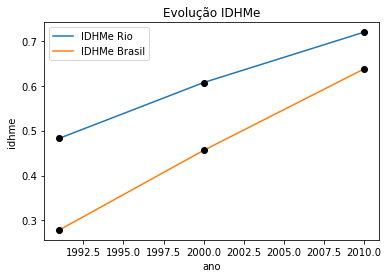

(        ano  idhm_e
 3241   1991   0.483
 8806   2000   0.607
 14371  2010   0.719,
     ano  idhm_e
 0  1991   0.279
 1  2000   0.456
 2  2010   0.637)

In [79]:
#criando os dataframes de idhme para Brasil e Rio
df_idhme_br = df_adh_br[['ano', 'idhm_e']]
df_idhme_rj = df_adh_rj[['ano', 'idhm_e']]

#plotando os valores
x_axis = df_adh_rj['ano']
y_axis = df_adh_rj['idhm_e']
x_axis_br = df_adh_br['ano']
y_axis_br = df_adh_br['idhm_e']

plt.plot(x_axis, y_axis, label='IDHMe Rio')
plt.plot(x_axis, y_axis, 'o', color='black')
plt.plot(x_axis_br, y_axis_br, label='IDHMe Brasil')
plt.plot(x_axis_br, y_axis_br, 'o', color='black')

plt.title('Evolução IDHMe')
plt.xlabel('ano')
plt.ylabel('idhme')
plt.legend(loc='best')
plt.show()

df_idhme_rj, df_idhme_br

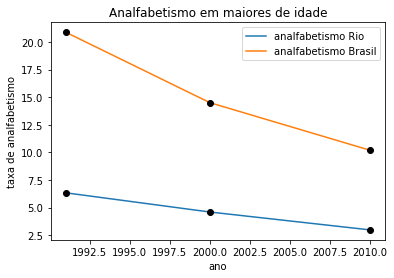

(    ano  taxa_analfabetismo_18_mais
 0  1991                       20.88
 1  2000                       14.50
 2  2010                       10.19,
         ano  taxa_analfabetismo_18_mais
 3241   1991                        6.34
 8806   2000                        4.60
 14371  2010                        2.98)

In [80]:
#criando os dataframes de analfabetismo para o Brasil e para o Rio
df_analfabetismo_br = df_adh_br[['ano', 'taxa_analfabetismo_18_mais']]
df_analfabetismo_rj = df_adh_rj[['ano', 'taxa_analfabetismo_18_mais']]

#plotando os valores
x_axis = df_adh_rj['ano']
y_axis = df_adh_rj['taxa_analfabetismo_18_mais']
x_axis_br = df_adh_br['ano']
y_axis_br = df_adh_br['taxa_analfabetismo_18_mais']

plt.plot(x_axis, y_axis, label='analfabetismo Rio')
plt.plot(x_axis, y_axis, 'o', color='black')
plt.plot(x_axis_br, y_axis_br, label='analfabetismo Brasil')
plt.plot(x_axis_br, y_axis_br, 'o', color='black')

plt.title('Analfabetismo em maiores de idade')
plt.xlabel('ano')
plt.ylabel('taxa de analfabetismo')
plt.legend(loc='best')
plt.show()

df_analfabetismo_br, df_analfabetismo_rj

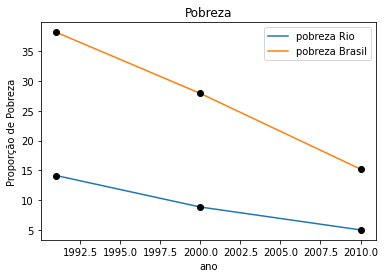

(    ano  prop_pobreza
 0  1991         38.16
 1  2000         27.90
 2  2010         15.20,
         ano  prop_pobreza
 3241   1991         14.13
 8806   2000          8.85
 14371  2010          5.01)

In [81]:
#criando os dataframes referentes à pobreza para Brasil e Rio
df_pob_br = df_adh_br[['ano', 'prop_pobreza']]
df_pob_rj = df_adh_rj[['ano', 'prop_pobreza']]

#plotando os valores
x_axis = df_adh_rj['ano']
y_axis = df_adh_rj['prop_pobreza']
x_axis_br = df_adh_br['ano']
y_axis_br = df_adh_br['prop_pobreza']

plt.plot(x_axis, y_axis, label='pobreza Rio')
plt.plot(x_axis, y_axis, 'o', color='black')
plt.plot(x_axis_br, y_axis_br, label='pobreza Brasil')
plt.plot(x_axis_br, y_axis_br, 'o', color='black')

plt.title('Pobreza')
plt.xlabel('ano')
plt.ylabel('Proporção de Pobreza')
plt.legend(loc='best')
plt.show()
df_pob_br, df_pob_rj


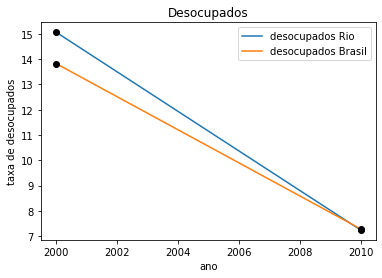

(    ano  taxa_desocupacao_18_mais
 0  1991                       NaN
 1  2000                     13.82
 2  2010                      7.29,
         ano  taxa_desocupacao_18_mais
 3241   1991                       NaN
 8806   2000                     15.06
 14371  2010                      7.25)

In [82]:
#criando os dataframes referentes à desocupação no Brasil e no Rio
df_desoc_br = df_adh_br[['ano', 'taxa_desocupacao_18_mais']]
df_desoc_rj = df_adh_rj[['ano', 'taxa_desocupacao_18_mais']]

#plotando valores
x_axis = df_adh_rj['ano']
y_axis = df_adh_rj['taxa_desocupacao_18_mais']
x_axis_br = df_adh_br['ano']
y_axis_br = df_adh_br['taxa_desocupacao_18_mais']

plt.plot(x_axis, y_axis, label='desocupados Rio')
plt.plot(x_axis, y_axis, 'o', color='black')
plt.plot(x_axis_br, y_axis_br, label='desocupados Brasil')
plt.plot(x_axis_br, y_axis_br, 'o', color='black')

plt.title('Desocupados')
plt.xlabel('ano')
plt.ylabel('taxa de desocupados')
plt.legend(loc='best')
plt.show()

df_desoc_br, df_desoc_rj

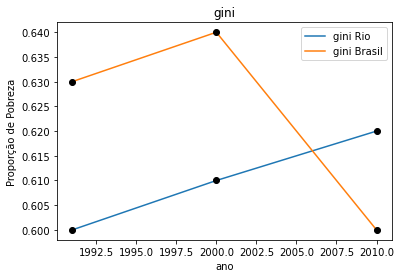

(        ano  indice_gini
 3241   1991         0.60
 8806   2000         0.61
 14371  2010         0.62,
     ano  indice_gini
 0  1991         0.63
 1  2000         0.64
 2  2010         0.60)

In [83]:
#criando dataframes referentes ao índice Gini no Brasil e no Rio
df_gini_br = df_adh_br[['ano', 'indice_gini']]
df_gini_rj = df_adh_rj[['ano', 'indice_gini']]

#plotando valores
x_axis = df_adh_rj['ano']
y_axis = df_adh_rj['indice_gini']
x_axis_br = df_adh_br['ano']
y_axis_br = df_adh_br['indice_gini']

plt.plot(x_axis, y_axis, label='gini Rio')
plt.plot(x_axis, y_axis, 'o', color='black')
plt.plot(x_axis_br, y_axis_br, label='gini Brasil')
plt.plot(x_axis_br, y_axis_br, 'o', color='black')

plt.title('gini')
plt.xlabel('ano')
plt.ylabel('Proporção de Pobreza')
plt.legend(loc='best')
plt.show()
df_gini_rj, df_gini_br


In [84]:
#selecionado apenas os dados referentes ao ultimo IPS
df_indicadores_rj_2020 = (df_indicadores_rj[df_indicadores_rj['ano'] == 2020]).copy()
#criando dataframe para taxa de homicídios no Rio
homicidios = df_indicadores_rj_2020[['taxa_homicidios']]

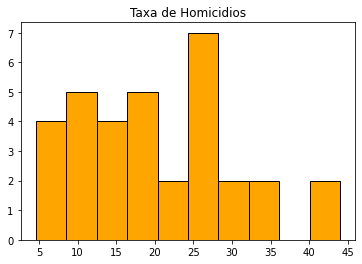

In [85]:
#plotando valores
plt.hist(homicidios, color = 'orange', edgecolor = 'black')
plt.title('Taxa de Homicidios')
plt.show()

In [86]:
#criando dataframe com taxa de homicídio e sua respectiva região administrativa e ordenando em ordem crescente
homicidios_bairro = df_indicadores_rj_2020[['regiao_administrativa', 'taxa_homicidios']]
homicidios_bairro = homicidios_bairro.sort_values(by = 'taxa_homicidios')
#homicidios_bairro

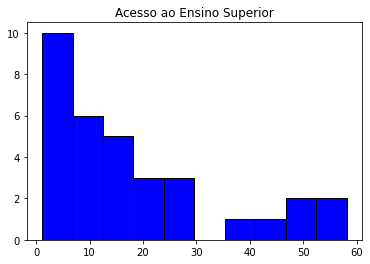

In [87]:
#criando dataframe referente ao acesso ao ensino superior no rio
ensino_superior = df_indicadores_rj_2020[['prop_pessoas_ensino_superior']]

#plotando valores
plt.hist(ensino_superior, color = 'blue', edgecolor = 'black')
plt.title('Acesso ao Ensino Superior')
plt.show()

In [88]:
#criando dataframe com índices de acesso ao ensino superio e suas respectivas regiões administrativas 
ensino_superior_bairro = df_indicadores_rj_2020[['regiao_administrativa', 'prop_pessoas_ensino_superior']]

#ordenando em ordem crescente
ensino_superior_bairro = ensino_superior_bairro.sort_values(by = 'prop_pessoas_ensino_superior')
#ensino_superior_bairro


[]

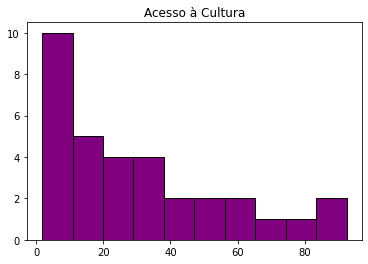

In [89]:
#criando df com indice de acesso à cultura
cultura = df_indicadores_rj_2020[['indice_acesso_cultura']]

#plotando valores
plt.hist(cultura, color = 'purple', edgecolor = 'black')
plt.title('Acesso à Cultura')
plt.plot()

In [90]:
#criando dataframe com regiões administrativas e suas respectivas notas em acesso à cultura
cultura_bairro = df_indicadores_rj_2020[['regiao_administrativa', 'indice_acesso_cultura']]

#ordenando regiões em ordem decrescente de acordo com a nota recebida
cultura_bairro = cultura_bairro.sort_values(by = 'indice_acesso_cultura', ascending = False)
#cultura_bairro

,prop_pessoas_ensino_superior,taxa_homicidios
prop_pessoas_ensino_superior,1.000000,-0.502583
taxa_homicidios,-0.502583,1.000000


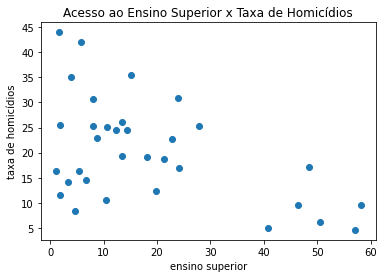

In [91]:
#criando o dataframe da primeira correlação
corr1 = pd.concat([ensino_superior, homicidios], axis=1)

#plotando o gráfico
plt.scatter(ensino_superior, homicidios)
plt.title('Acesso ao Ensino Superior x Taxa de Homicídios')
plt.xlabel('ensino superior')
plt.ylabel('taxa de homicídios')
plt.plot()

#calculando a correlação
corr1.corr()

,prop_gravidez_adolescencia,prop_pessoas_ensino_superior
prop_gravidez_adolescencia,1.000000,-0.907962
prop_pessoas_ensino_superior,-0.907962,1.000000


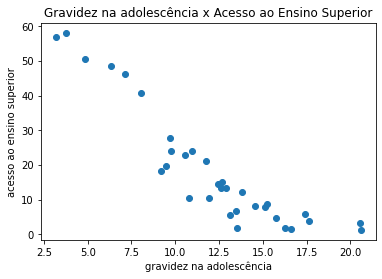

In [92]:
#criando df com indice de gravidez na adolescência
gravidez_adol = df_indicadores_rj_2020[['prop_gravidez_adolescencia']]

#criando o dataframe da segunda
corr2 = pd.concat([gravidez_adol, ensino_superior], axis=1)

#plotando o gráfico de correlação
plt.scatter(gravidez_adol, ensino_superior)
plt.title('Gravidez na adolescência x Acesso ao Ensino Superior')
plt.xlabel('gravidez na adolescência')
plt.ylabel('acesso ao ensino superior')
plt.plot()

#calculando a correlação
corr2.corr()

,prop_acesso_internet,prop_gravidez_adolescencia
prop_acesso_internet,1.000000,-0.917844
prop_gravidez_adolescencia,-0.917844,1.000000


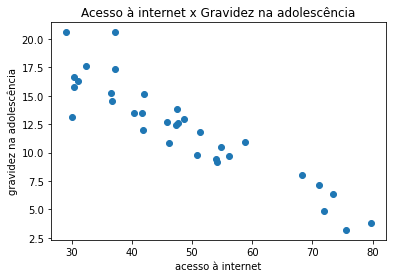

In [93]:
#criando df com indice de acesso à internet
acesso_internet = df_indicadores_rj_2020[['prop_acesso_internet']]

#criando o dataframe da terceira correlação
corr3 = pd.concat([acesso_internet, gravidez_adol], axis=1)

#plotando o gráfico de correlação
plt.scatter(acesso_internet, gravidez_adol)
plt.title('Acesso à internet x Gravidez na adolescência')
plt.xlabel('acesso à internet')
plt.ylabel('gravidez na adolescência')
plt.plot()

#calculando a correlação
corr3.corr()